In [3]:
import torch
import torch.nn.functional as F
import torchvision.transforms.functional as Fv
import cv2
import matplotlib.pyplot as plt
import plot
import numpy as np
import scipy.ndimage


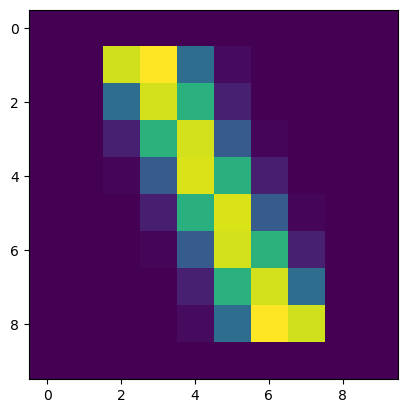

In [6]:
l=8
slope=2
angle = np.arctan(slope)
win = np.eye(l)

if not np.isclose(angle, np.pi / 4):
    win = scipy.ndimage.rotate(
        win, 45 - angle * 180 / np.pi, order=5, prefilter=False
    )
plt.imshow(win)
plt.show()

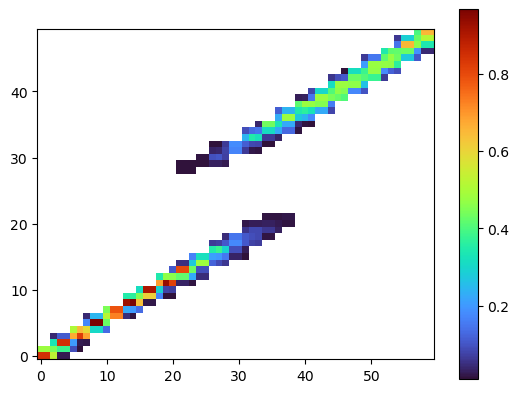

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/thresh.cpp:1679: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'adaptiveThreshold'


In [19]:
H = torch.load("H_1.00.torch")
dest_shape = 50, 60
threshold = 1e-3
blur_size: int = 3
resize_mode = "area"

im=plot.imshow_highlight_zero(H_np, origin="lower", cmap="turbo")
plt.colorbar(im)
plt.show()

H_np = cv2.adaptiveThreshold(H_np, H_np.max(), cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_TOZERO, 3, 2)
im=plot.imshow_highlight_zero(H_np, origin="lower", cmap="turbo")
plt.colorbar(im)
plt.show()